# 1. Import and Install Dependencies

In [4]:
!pip install opencv-python mediapipe sklearn

In [5]:
!conda list

# packages in environment at C:\Users\GW\anaconda3\envs\k-digital:
#
# Name                    Version                   Build  Channel
absl-py                   0.15.0                   pypi_0    pypi
argon2-cffi               21.3.0                   pypi_0    pypi
argon2-cffi-bindings      21.2.0                   pypi_0    pypi
asttokens                 2.0.5                    pypi_0    pypi
astunparse                1.6.3                    pypi_0    pypi
attrs                     21.4.0                   pypi_0    pypi
backcall                  0.2.0                    pypi_0    pypi
bleach                    4.1.0                    pypi_0    pypi
ca-certificates           2022.2.1             haa95532_0  
cachetools                5.0.0                    pypi_0    pypi
certifi                   2021.10.8        py38haa95532_2  
cffi                      1.15.0                   pypi_0    pypi
charset-normalizer        2.0.12                   pypi_0    pypi
colorama          

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

- mediapipe holistic : https://google.github.io/mediapipe/solutions/holistic.html
    -  포즈 , 얼굴 랜드마크 및 실시간 손 추적, 제스처 제어 및 수화 인식 등 가능.스켈레톤을 따는 별도의 AI 임포트 가능.
- mediapipe drawing_utils
    - 스켈레톤 그리기.   
    
- Landmark localization :https://ydy8989.github.io/2021-03-11-panoptic/
    - 얼굴 혹은 사람의 특정 물체에 대하여 중요하다고 생각되는 특징 부분들(아래 그림에서 point 부분 =landmark)을 추정하고 추적하는 task를 의미

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction. Model : holistic, image를 입력해 스켈레톤을 좌표값을 생성.
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
# 입력 image에 landmarks 얹는 함수.
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # image : frame, results : model.predict(image)
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [9]:
cap = cv2.VideoCapture(0) # 캠 실행

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read() # return value, image from webcam

        # Make detections
        image, results = mediapipe_detection(frame, holistic) # 예측 : 스켈레톤 생성.
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results) # 이미지에 스켈레톤 얹기.

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q') :
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [13]:
# holistic에 왼쪽 손이 포착되어야 값이 나옴.
len(results.left_hand_landmarks.landmark)

21

In [8]:
frame.shape

(480, 640, 3)

In [14]:
results

mediapipe.python.solution_base.SolutionOutputs

In [16]:
draw_landmarks(frame, results)

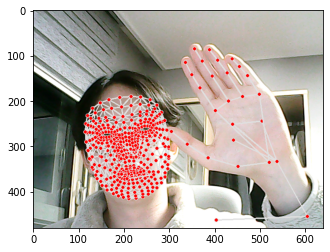

In [17]:
# draw_landmarks를 해야 landmark가 나옴. (실시간영상에선 image에 landmark를 얹었음.)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

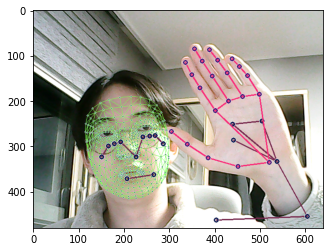

In [18]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

- 학습에 사용하기 위한 키포인트 값을 생성하기 이전, 값을 출력해봄.
- landmark를 출력할 때 x,y 좌표값 출력.

In [28]:
# 키포인트 개수
len(results.left_hand_landmarks.landmark), len(results.face_landmarks.landmark), len(results.pose_landmarks.landmark)

(21, 468, 33)

In [25]:
type(results.left_hand_landmarks.landmark), results.left_hand_landmarks.landmark[0]

(google.protobuf.pyext._message.RepeatedCompositeContainer,
 x: 0.8152941465377808
 y: 0.6995338797569275
 z: 4.3288630990900856e-07)

In [31]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [32]:
# pose, face, lh, rh 좌표값 리스트화.
# 132 = 33 x 4
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
# 1404 = 468 x 3
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
# 63 = 21 x 3
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [33]:
# 함수화 : 각 좌표값을 한 ndarray로 concat.
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [34]:
result_test = extract_keypoints(results)

In [38]:
# 1662 = 132 + 1404 + 63*2
result_test.shape, result_test

((1662,),
 array([ 0.354812  ,  0.67460507, -1.17434382, ...,  0.        ,
         0.        ,  0.        ]))

In [36]:
# 한 이미지의 값을 0.npy로 저장.
np.save('0', result_test)

In [37]:
np.load('0.npy')

array([ 0.354812  ,  0.67460507, -1.17434382, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [40]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [20]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [41]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [42]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results) # result : 스켈레톤 좌표값.
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [43]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [44]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [45]:
label_map = {label:num for num, label in enumerate(actions)}

In [46]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [47]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [48]:
np.array(sequences).shape

(90, 30, 1662)

In [49]:
np.array(labels).shape

(90,)

In [50]:
X = np.array(sequences)

In [51]:
X.shape

(90, 30, 1662)

In [52]:
y = to_categorical(labels).astype(int)

In [53]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [55]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf

In [57]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [58]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [59]:
res = [.7, 0.2, 0.1]

In [60]:
actions[np.argmax(res)]

'hello'

In [61]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [62]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 3s 60ms/step - loss: 1.1032 - categorical_accuracy: 0.3059
Epoch 2/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.3481 - categorical_accuracy: 0.3059
Epoch 3/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.1471 - categorical_accuracy: 0.2000
Epoch 4/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0369 - categorical_accuracy: 0.3882
Epoch 5/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.8613 - categorical_accuracy: 0.4941
Epoch 6/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.8594 - categorical_accuracy: 0.4824
Epoch 7/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.6560 - categorical_accuracy: 0.6588
Epoch 8/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.3917 - categorical_accuracy: 0.7529
Epoch 9/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.2591 - categorical_accuracy: 0.9176
E

3/3 [==============================] - 0s 56ms/step - loss: 0.5311 - categorical_accuracy: 0.7176
Epoch 147/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.5208 - categorical_accuracy: 0.8235
Epoch 148/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.5051 - categorical_accuracy: 0.9059
Epoch 149/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.4714 - categorical_accuracy: 0.9176
Epoch 150/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.4565 - categorical_accuracy: 0.8941
Epoch 151/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.4428 - categorical_accuracy: 0.9294
Epoch 152/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.4318 - categorical_accuracy: 0.8706
Epoch 153/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.4052 - categorical_accuracy: 0.9294
Epoch 154/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.3994 - categorical_accuracy: 0.894

3/3 [==============================] - 0s 54ms/step - loss: 0.1914 - categorical_accuracy: 0.9294
Epoch 291/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1896 - categorical_accuracy: 0.9294
Epoch 292/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1937 - categorical_accuracy: 0.9294
Epoch 293/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.1850 - categorical_accuracy: 0.9294
Epoch 294/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.1838 - categorical_accuracy: 0.9294
Epoch 295/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1847 - categorical_accuracy: 0.9294
Epoch 296/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1909 - categorical_accuracy: 0.9294
Epoch 297/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.1818 - categorical_accuracy: 0.9294
Epoch 298/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1644 - categorical_accuracy: 0.929

3/3 [==============================] - 0s 54ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 435/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 436/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 437/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 438/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 439/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 440/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 441/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 442/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0011 - categorical_accuracy: 1.000

3/3 [==============================] - 0s 56ms/step - loss: 1.5980e-04 - categorical_accuracy: 1.0000
Epoch 575/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.5896e-04 - categorical_accuracy: 1.0000
Epoch 576/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.5759e-04 - categorical_accuracy: 1.0000
Epoch 577/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.5626e-04 - categorical_accuracy: 1.0000
Epoch 578/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.5521e-04 - categorical_accuracy: 1.0000
Epoch 579/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.5410e-04 - categorical_accuracy: 1.0000
Epoch 580/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.5296e-04 - categorical_accuracy: 1.0000
Epoch 581/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.5182e-04 - categorical_accuracy: 1.0000
Epoch 582/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.50

3/3 [==============================] - 0s 55ms/step - loss: 6.9317e-05 - categorical_accuracy: 1.0000
Epoch 715/2000
3/3 [==============================] - 0s 55ms/step - loss: 6.8977e-05 - categorical_accuracy: 1.0000
Epoch 716/2000
3/3 [==============================] - 0s 53ms/step - loss: 6.8567e-05 - categorical_accuracy: 1.0000
Epoch 717/2000
3/3 [==============================] - 0s 54ms/step - loss: 6.8250e-05 - categorical_accuracy: 1.0000
Epoch 718/2000
3/3 [==============================] - 0s 55ms/step - loss: 6.7887e-05 - categorical_accuracy: 1.0000
Epoch 719/2000
3/3 [==============================] - 0s 52ms/step - loss: 6.7650e-05 - categorical_accuracy: 1.0000
Epoch 720/2000
3/3 [==============================] - 0s 56ms/step - loss: 6.7339e-05 - categorical_accuracy: 1.0000
Epoch 721/2000
3/3 [==============================] - 0s 54ms/step - loss: 6.7008e-05 - categorical_accuracy: 1.0000
Epoch 722/2000
3/3 [==============================] - 0s 53ms/step - loss: 6.65

3/3 [==============================] - 0s 61ms/step - loss: 3.5571e-05 - categorical_accuracy: 1.0000
Epoch 855/2000
3/3 [==============================] - 0s 54ms/step - loss: 3.5459e-05 - categorical_accuracy: 1.0000
Epoch 856/2000
3/3 [==============================] - 0s 55ms/step - loss: 3.5330e-05 - categorical_accuracy: 1.0000
Epoch 857/2000
3/3 [==============================] - 0s 55ms/step - loss: 3.5142e-05 - categorical_accuracy: 1.0000
Epoch 858/2000
3/3 [==============================] - 0s 54ms/step - loss: 3.4974e-05 - categorical_accuracy: 1.0000
Epoch 859/2000
3/3 [==============================] - 0s 54ms/step - loss: 3.4910e-05 - categorical_accuracy: 1.0000
Epoch 860/2000
3/3 [==============================] - 0s 57ms/step - loss: 3.4701e-05 - categorical_accuracy: 1.0000
Epoch 861/2000
3/3 [==============================] - 0s 55ms/step - loss: 3.4565e-05 - categorical_accuracy: 1.0000
Epoch 862/2000
3/3 [==============================] - 0s 56ms/step - loss: 3.44

3/3 [==============================] - 0s 99ms/step - loss: 2.7101e-05 - categorical_accuracy: 1.0000
Epoch 925/2000
3/3 [==============================] - 0s 98ms/step - loss: 2.7081e-05 - categorical_accuracy: 1.0000
Epoch 926/2000
3/3 [==============================] - 0s 109ms/step - loss: 2.6904e-05 - categorical_accuracy: 1.0000
Epoch 927/2000
3/3 [==============================] - 0s 113ms/step - loss: 2.6841e-05 - categorical_accuracy: 1.0000
Epoch 928/2000
3/3 [==============================] - 0s 79ms/step - loss: 2.6674e-05 - categorical_accuracy: 1.0000
Epoch 929/2000
3/3 [==============================] - 0s 134ms/step - loss: 2.6589e-05 - categorical_accuracy: 1.0000
Epoch 930/2000
3/3 [==============================] - 0s 98ms/step - loss: 2.6484e-05 - categorical_accuracy: 1.0000
Epoch 931/2000
3/3 [==============================] - 0s 100ms/step - loss: 2.6398e-05 - categorical_accuracy: 1.0000
Epoch 932/2000
3/3 [==============================] - 0s 119ms/step - loss:

3/3 [==============================] - 0s 56ms/step - loss: 2.1183e-05 - categorical_accuracy: 1.0000
Epoch 995/2000
3/3 [==============================] - 0s 56ms/step - loss: 2.1123e-05 - categorical_accuracy: 1.0000
Epoch 996/2000
3/3 [==============================] - 0s 52ms/step - loss: 2.1075e-05 - categorical_accuracy: 1.0000
Epoch 997/2000
3/3 [==============================] - 0s 56ms/step - loss: 2.0956e-05 - categorical_accuracy: 1.0000
Epoch 998/2000
3/3 [==============================] - 0s 56ms/step - loss: 2.0877e-05 - categorical_accuracy: 1.0000
Epoch 999/2000
3/3 [==============================] - 0s 57ms/step - loss: 2.0804e-05 - categorical_accuracy: 1.0000
Epoch 1000/2000
3/3 [==============================] - 0s 58ms/step - loss: 2.0790e-05 - categorical_accuracy: 1.0000
Epoch 1001/2000
3/3 [==============================] - 0s 59ms/step - loss: 2.0670e-05 - categorical_accuracy: 1.0000
Epoch 1002/2000
3/3 [==============================] - 0s 54ms/step - loss: 2

3/3 [==============================] - 0s 56ms/step - loss: 1.3821e-05 - categorical_accuracy: 1.0000
Epoch 1133/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.3791e-05 - categorical_accuracy: 1.0000
Epoch 1134/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.3717e-05 - categorical_accuracy: 1.0000
Epoch 1135/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.3668e-05 - categorical_accuracy: 1.0000
Epoch 1136/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.3610e-05 - categorical_accuracy: 1.0000
Epoch 1137/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.3595e-05 - categorical_accuracy: 1.0000
Epoch 1138/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.3596e-05 - categorical_accuracy: 1.0000
Epoch 1139/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.3570e-05 - categorical_accuracy: 1.0000
Epoch 1140/2000
3/3 [==============================] - 0s 57ms/step - lo

3/3 [==============================] - 0s 54ms/step - loss: 9.3163e-06 - categorical_accuracy: 1.0000
Epoch 1271/2000
3/3 [==============================] - 0s 56ms/step - loss: 9.2798e-06 - categorical_accuracy: 1.0000
Epoch 1272/2000
3/3 [==============================] - 0s 55ms/step - loss: 9.2476e-06 - categorical_accuracy: 1.0000
Epoch 1273/2000
3/3 [==============================] - 0s 61ms/step - loss: 9.2462e-06 - categorical_accuracy: 1.0000
Epoch 1274/2000
3/3 [==============================] - 0s 57ms/step - loss: 9.2069e-06 - categorical_accuracy: 1.0000
Epoch 1275/2000
3/3 [==============================] - 0s 53ms/step - loss: 9.1831e-06 - categorical_accuracy: 1.0000
Epoch 1276/2000
3/3 [==============================] - 0s 51ms/step - loss: 9.1396e-06 - categorical_accuracy: 1.0000
Epoch 1277/2000
3/3 [==============================] - 0s 56ms/step - loss: 9.1663e-06 - categorical_accuracy: 1.0000
Epoch 1278/2000
3/3 [==============================] - 0s 56ms/step - lo

3/3 [==============================] - 0s 55ms/step - loss: 6.4400e-06 - categorical_accuracy: 1.0000
Epoch 1409/2000
3/3 [==============================] - 0s 53ms/step - loss: 6.4316e-06 - categorical_accuracy: 1.0000
Epoch 1410/2000
3/3 [==============================] - 0s 57ms/step - loss: 6.4063e-06 - categorical_accuracy: 1.0000
Epoch 1411/2000
3/3 [==============================] - 0s 58ms/step - loss: 6.4049e-06 - categorical_accuracy: 1.0000
Epoch 1412/2000
3/3 [==============================] - 0s 58ms/step - loss: 6.3783e-06 - categorical_accuracy: 1.0000
Epoch 1413/2000
3/3 [==============================] - 0s 55ms/step - loss: 6.3685e-06 - categorical_accuracy: 1.0000
Epoch 1414/2000
3/3 [==============================] - 0s 51ms/step - loss: 6.3572e-06 - categorical_accuracy: 1.0000
Epoch 1415/2000
3/3 [==============================] - 0s 55ms/step - loss: 6.3418e-06 - categorical_accuracy: 1.0000
Epoch 1416/2000
3/3 [==============================] - 0s 56ms/step - lo

3/3 [==============================] - 0s 55ms/step - loss: 4.5439e-06 - categorical_accuracy: 1.0000
Epoch 1547/2000
3/3 [==============================] - 0s 59ms/step - loss: 4.5397e-06 - categorical_accuracy: 1.0000
Epoch 1548/2000
3/3 [==============================] - 0s 55ms/step - loss: 4.5257e-06 - categorical_accuracy: 1.0000
Epoch 1549/2000
3/3 [==============================] - 0s 52ms/step - loss: 4.5145e-06 - categorical_accuracy: 1.0000
Epoch 1550/2000
3/3 [==============================] - 0s 54ms/step - loss: 4.5032e-06 - categorical_accuracy: 1.0000
Epoch 1551/2000
3/3 [==============================] - 0s 55ms/step - loss: 4.4962e-06 - categorical_accuracy: 1.0000
Epoch 1552/2000
3/3 [==============================] - 0s 55ms/step - loss: 4.4808e-06 - categorical_accuracy: 1.0000
Epoch 1553/2000
3/3 [==============================] - 0s 56ms/step - loss: 4.4668e-06 - categorical_accuracy: 1.0000
Epoch 1554/2000
3/3 [==============================] - 0s 55ms/step - lo

3/3 [==============================] - 0s 55ms/step - loss: 3.2705e-06 - categorical_accuracy: 1.0000
Epoch 1685/2000
3/3 [==============================] - 0s 57ms/step - loss: 3.2635e-06 - categorical_accuracy: 1.0000
Epoch 1686/2000
3/3 [==============================] - 0s 58ms/step - loss: 3.2523e-06 - categorical_accuracy: 1.0000
Epoch 1687/2000
3/3 [==============================] - 0s 58ms/step - loss: 3.2453e-06 - categorical_accuracy: 1.0000
Epoch 1688/2000
3/3 [==============================] - 0s 53ms/step - loss: 3.2354e-06 - categorical_accuracy: 1.0000
Epoch 1689/2000
3/3 [==============================] - 0s 54ms/step - loss: 3.2256e-06 - categorical_accuracy: 1.0000
Epoch 1690/2000
3/3 [==============================] - 0s 58ms/step - loss: 3.2158e-06 - categorical_accuracy: 1.0000
Epoch 1691/2000
3/3 [==============================] - 0s 57ms/step - loss: 3.2074e-06 - categorical_accuracy: 1.0000
Epoch 1692/2000
3/3 [==============================] - 0s 57ms/step - lo

3/3 [==============================] - 0s 57ms/step - loss: 2.3603e-06 - categorical_accuracy: 1.0000
Epoch 1823/2000
3/3 [==============================] - 0s 59ms/step - loss: 2.3575e-06 - categorical_accuracy: 1.0000
Epoch 1824/2000
3/3 [==============================] - 0s 56ms/step - loss: 2.3505e-06 - categorical_accuracy: 1.0000
Epoch 1825/2000
3/3 [==============================] - 0s 54ms/step - loss: 2.3379e-06 - categorical_accuracy: 1.0000
Epoch 1826/2000
3/3 [==============================] - 0s 51ms/step - loss: 2.3351e-06 - categorical_accuracy: 1.0000
Epoch 1827/2000
3/3 [==============================] - 0s 56ms/step - loss: 2.3323e-06 - categorical_accuracy: 1.0000
Epoch 1828/2000
3/3 [==============================] - 0s 57ms/step - loss: 2.3281e-06 - categorical_accuracy: 1.0000
Epoch 1829/2000
3/3 [==============================] - 0s 58ms/step - loss: 2.3225e-06 - categorical_accuracy: 1.0000
Epoch 1830/2000
3/3 [==============================] - 0s 57ms/step - lo

3/3 [==============================] - 0s 57ms/step - loss: 1.7194e-06 - categorical_accuracy: 1.0000
Epoch 1961/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.7152e-06 - categorical_accuracy: 1.0000
Epoch 1962/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.7124e-06 - categorical_accuracy: 1.0000
Epoch 1963/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.7096e-06 - categorical_accuracy: 1.0000
Epoch 1964/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.7068e-06 - categorical_accuracy: 1.0000
Epoch 1965/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.7040e-06 - categorical_accuracy: 1.0000
Epoch 1966/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.6970e-06 - categorical_accuracy: 1.0000
Epoch 1967/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.6914e-06 - categorical_accuracy: 1.0000
Epoch 1968/2000
3/3 [==============================] - 0s 55ms/step - lo

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# 8. Make Predictions

In [64]:
res = model.predict(X_test)

In [65]:
res

array([[7.6371754e-07, 9.9999893e-01, 3.7085377e-07],
       [9.9999988e-01, 3.2501745e-08, 8.3629672e-08],
       [4.5724377e-05, 9.9993980e-01, 1.4396295e-05],
       [9.9999976e-01, 1.3745426e-07, 1.3070975e-07],
       [8.4144546e-08, 9.9999976e-01, 6.1849342e-08]], dtype=float32)

In [66]:
actions[np.argmax(res[0])]

'thanks'

In [67]:
actions[np.argmax(y_test[3])]

'hello'

# 9. Save Weights

In [68]:
model.save('action.h5')

In [69]:
del model

In [70]:
model = tf.keras.models.load_model('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [71]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [72]:
yhat = model.predict(X_test)

In [73]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [74]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[2, 0],
        [0, 3]]], dtype=int64)

In [75]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [76]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

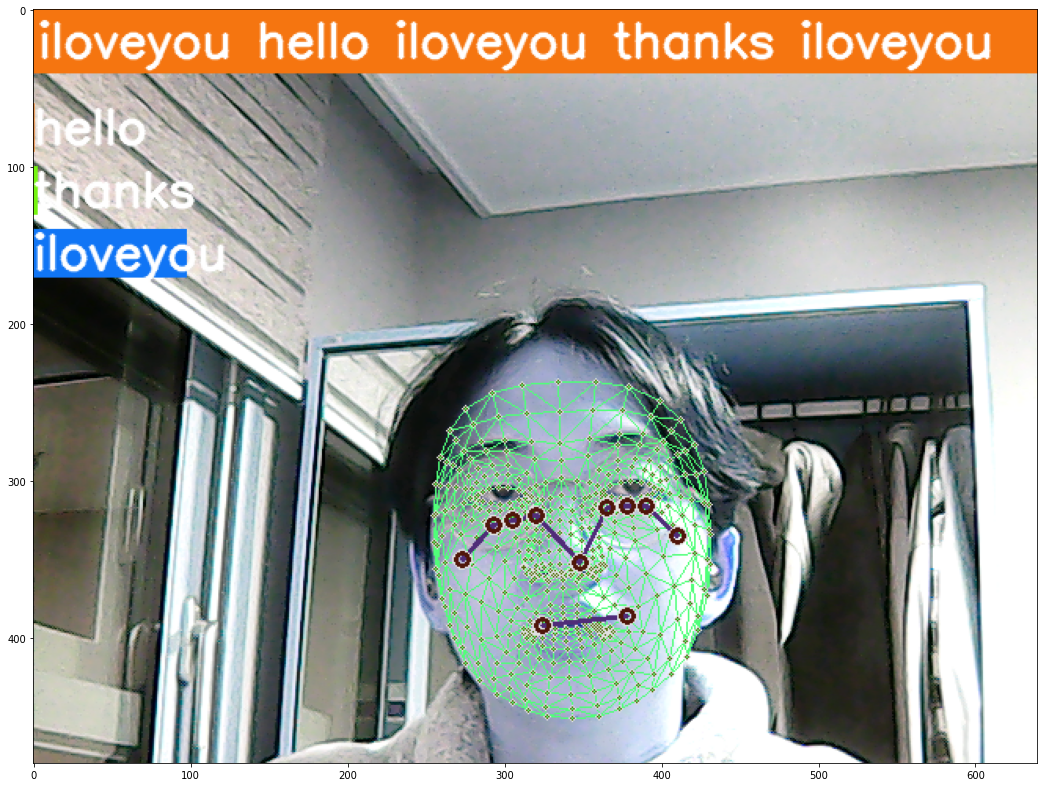

In [92]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [93]:
sequence.reverse()

In [94]:
len(sequence)

30

In [95]:
sequence.append('def')

In [96]:
sequence.reverse()

In [97]:
sequence[-30:]

[array([ 0.60131228,  0.73153073, -0.74150831, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.58879262,  0.72283721, -0.91055316, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.58237803,  0.7074253 , -0.95715964, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.58150047,  0.67513937, -0.95532674, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.57854551,  0.65770316, -1.1446588 , ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.57921112,  0.64625937, -1.04262304, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.56342351,  0.62223238, -1.07955778, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.56090379,  0.61402971, -1.03933334, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.55868685,  0.61235166, -1.13730073, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.55352247,  0.60955536, -1.13863516, ...,  0.        ,
         0.        ,  0.  

In [83]:
# 1. New detection variables

sequence = [] # 마지막 30프레임 저장
sentence = [] # 표출어 리스트
threshold = 0.8 # prob 0.8 이상일 때 출력

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarksq
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0] # output shape : (1,3)
            print(actions[np.argmax(res)]) # print text
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: # 확률 80% 이상일 때 텍스트 추가.
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]: # 이전 텍스트와 다를 때 새로 추가
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)]) # 첫글자는 그냥 추가

            if len(sentence) > 5: # 문자가 5개를 초과하면 앞 문자열 삭제
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors) # prob bar를 image에 얹기.
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1) # 텍스트박스
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA) # 텍스트 표출
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.S

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.so

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'me

In [84]:
cap.release()
cv2.destroyAllWindows()

In [85]:
res[np.argmax(res)] > threshold

True

In [87]:
(num_sequences,30,1662)

NameError: name 'num_sequences' is not defined

In [88]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[7.6379473e-07, 9.9999893e-01, 3.7084916e-07]], dtype=float32)

In [91]:
model.predict(np.expand_dims(sequence, axis=0)).shape

(1, 3)